In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
data = np.load("proccessed_waves.npz")
data_global = np.load("global_waves.npy")
#global_median = np.load("global_median.npy")
print(data)

NpzFile 'proccessed_waves.npz' with keys: nolinear, linear, step


In [3]:
def hpf(x, fc=0.1):
  freq = np.linspace(0, 30, len(x))
  F = np.fft.fft(x)
  G = F.copy()
  print(np.count_nonzero(freq < fc))
  G[(freq < fc)] = 0+0j
  g = np.fft.ifft(G)
  return freq, F, G, g.real

def normalize(x):
  return (x-x.min())/(x.max()-x.min())

def center(x):
  return x-x.mean()

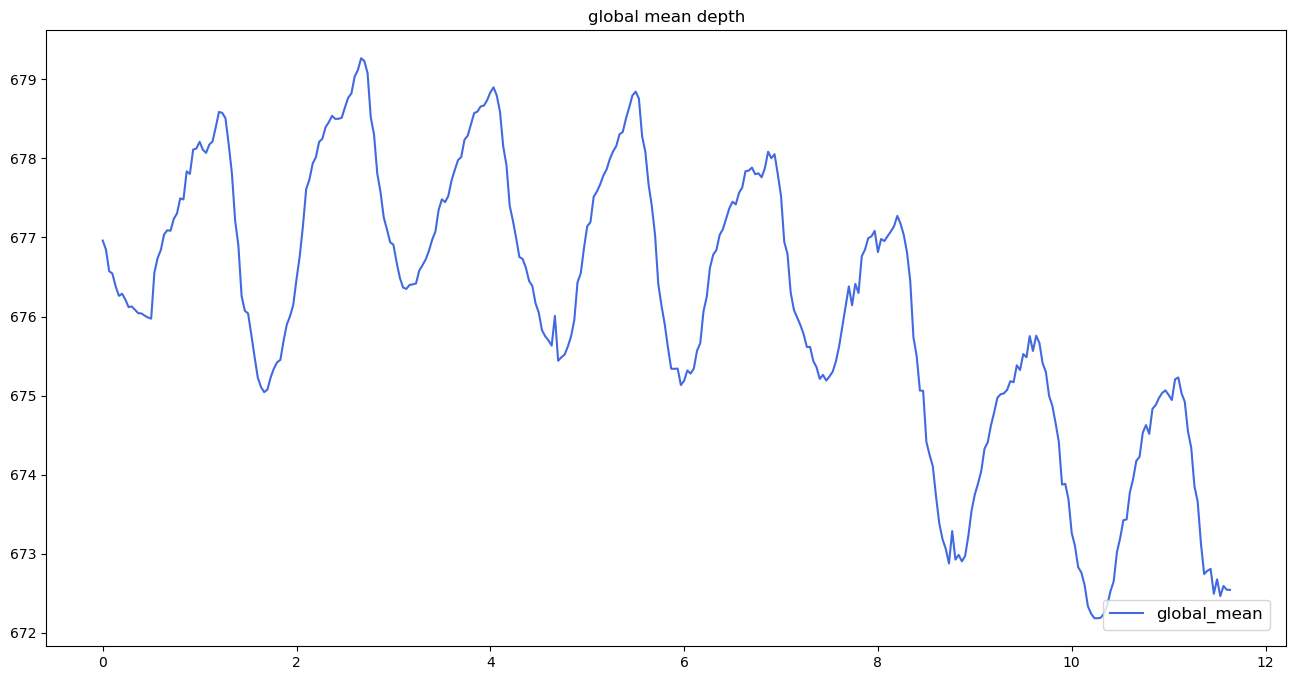

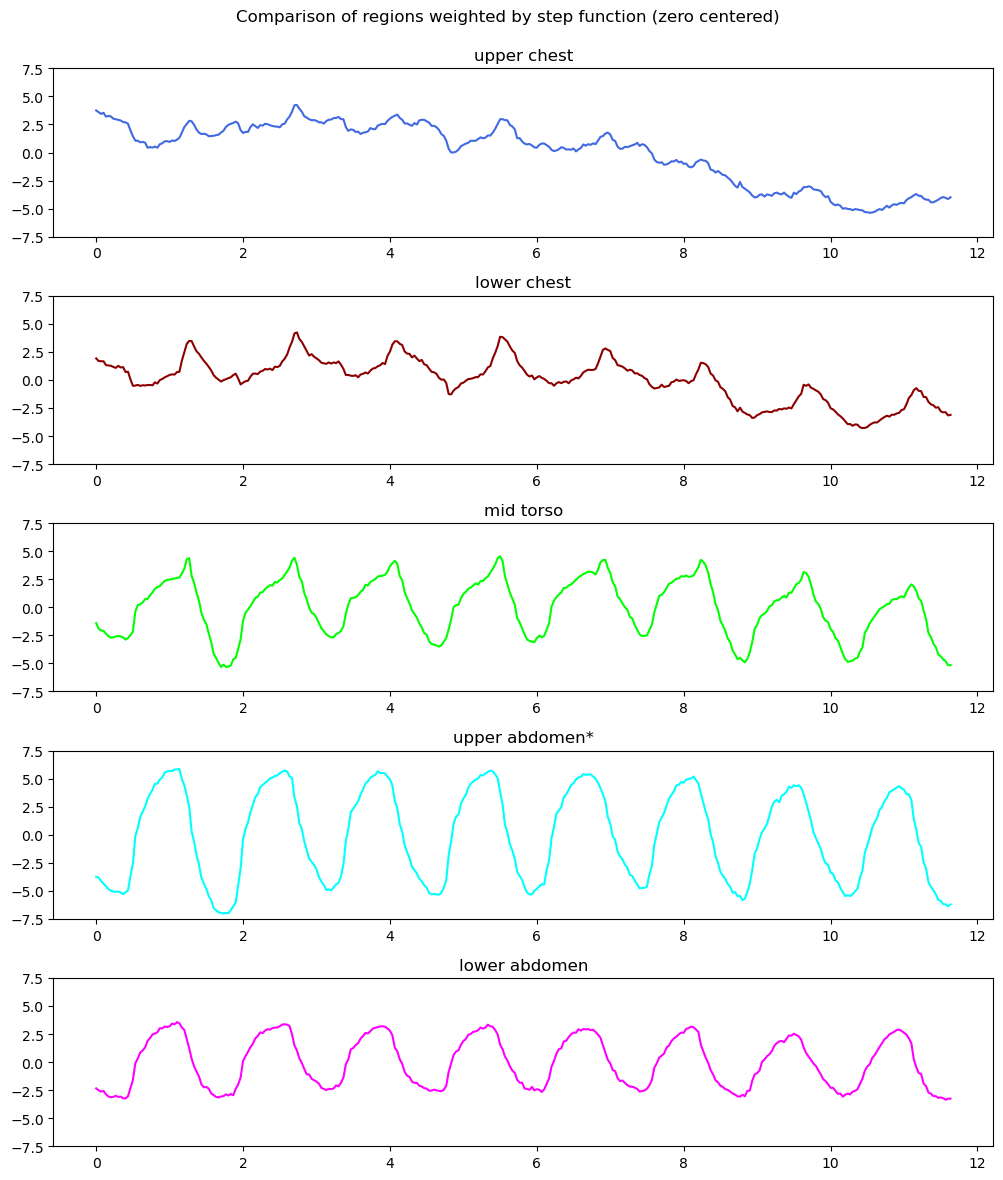

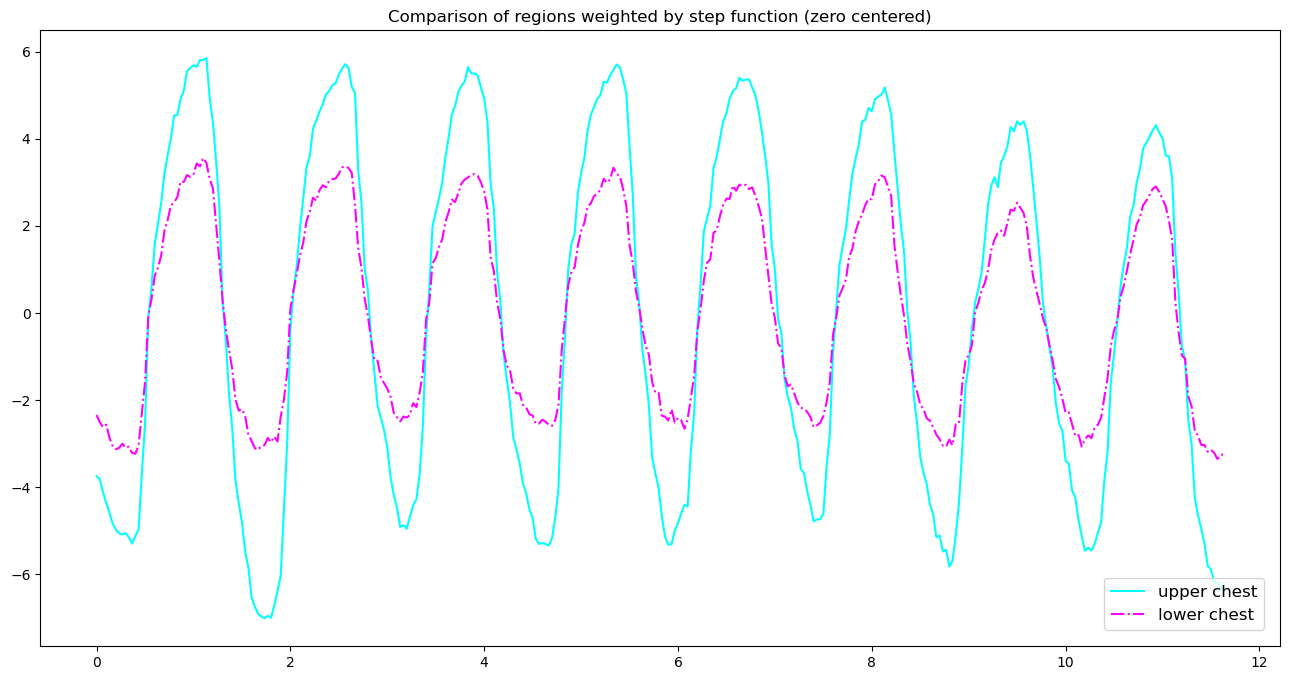

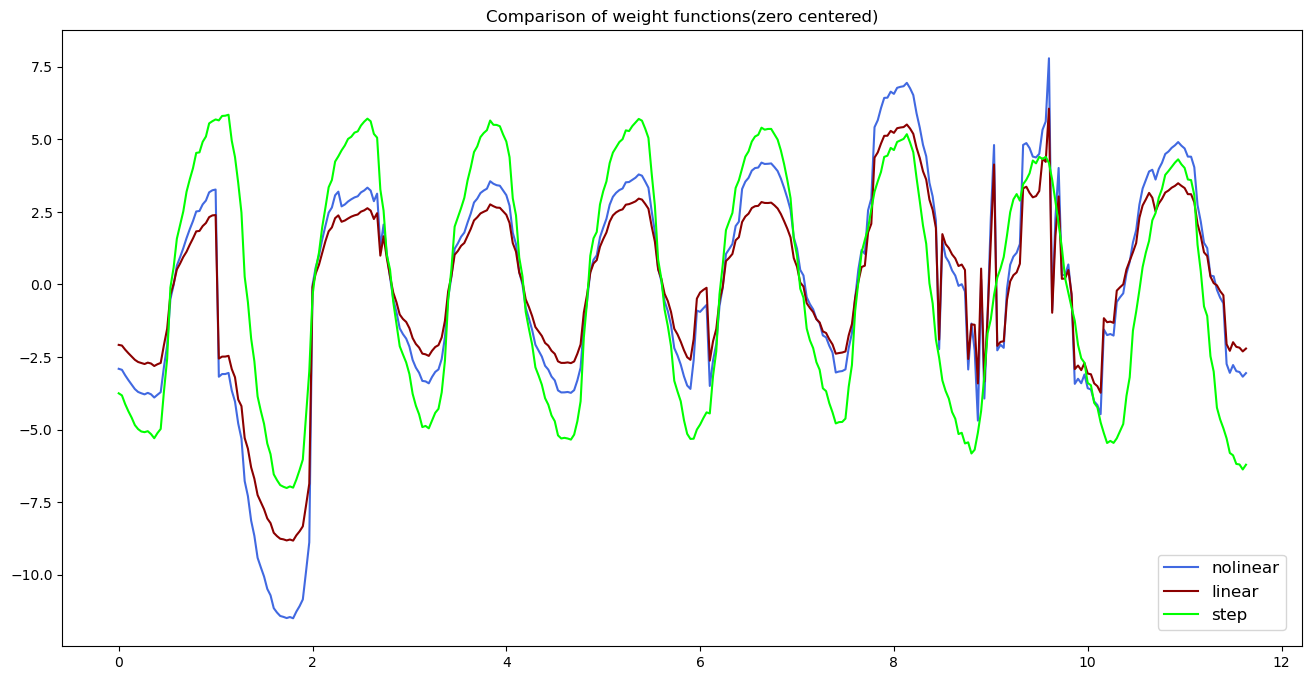

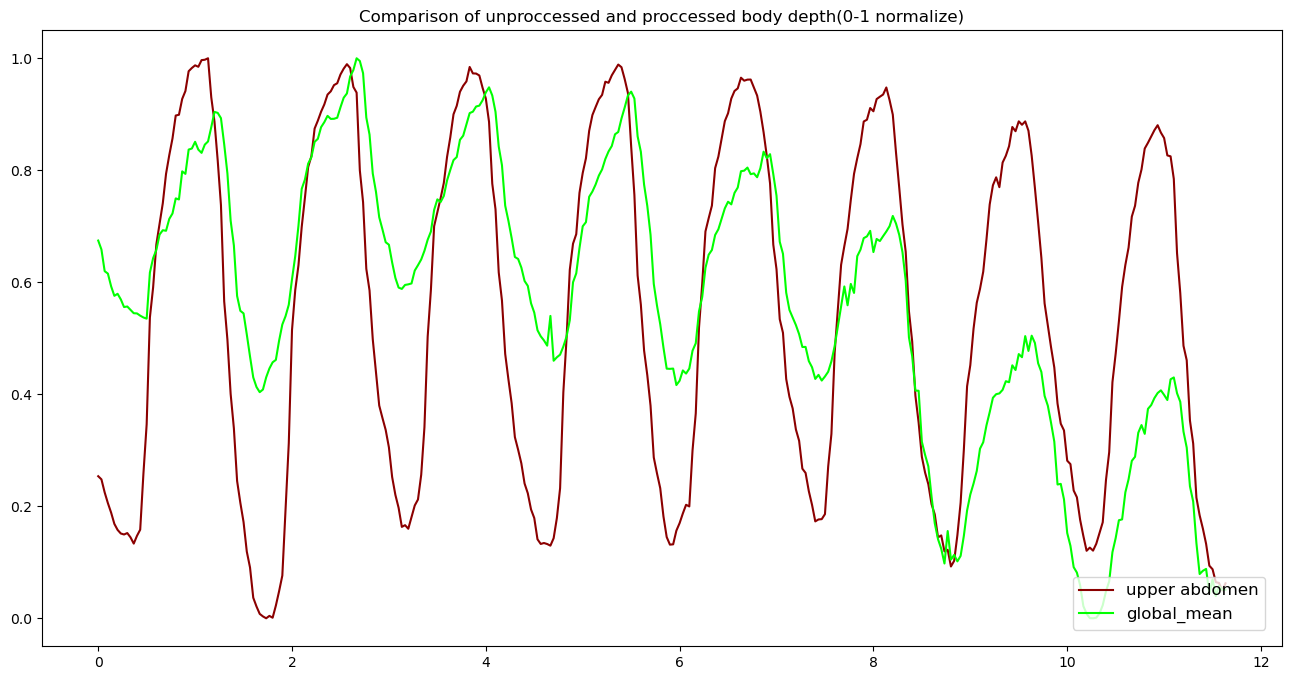

In [7]:
#1. 全体の深度のグラフ
#2. 各部位ごとのグラフ
#3. 重みづけ関数ごとのグラフ
#4. 最適なグラフと全体深度の比較
#5. グラフ内での０点位置と呼吸数

region_name = ["upper chest", "lower chest", "mid torso", "upper abdomen*", "lower abdomen"]
line_color = ["royalblue", "darkred", "lime", "cyan","magenta"]
line_type = ["-",  "-."]

X0 = 400
X_WIDTH = 350
X1 = X0+X_WIDTH
GRAPH_H=5

dt = 1/30
T = np.arange(X_WIDTH) * dt

y_global=data_global[X0:X1]
y_divided = data["step"][:, X0:X1]
y_weight = {k:v[3, X0:X1] for k,v in data.items()}
y_abdomen = y_divided[3]

plt.figure(figsize=(16,8))
plt.title("global mean depth")
plt.plot(T, y_global, color=line_color[0], label="global_mean", linewidth=1.5)
plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1, fontsize=12)

fig=plt.figure(figsize=(10,12))
for i, y in enumerate(y_divided):
  plt.subplot(5,1,i+1)
  plt.title(region_name[i])
  plt.ylim(-7.5, 7.5)
  plt.plot(T, center(y), color=line_color[i], label=region_name[i], linewidth=1.5)
  #plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1, fontsize=12)
fig.tight_layout(rect=[0,0,1,0.96])
fig.suptitle("Comparison of regions weighted by step function (zero centered)")  

plt.figure(figsize=(16,8))
plt.title("Comparison of regions weighted by step function (zero centered)")
for i, y in enumerate(y_divided[-2:]):
  plt.plot(T, center(y), color=line_color[i+3], linestyle=line_type[i], label=region_name[i], linewidth=1.5)
  plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1, fontsize=12)


plt.figure(figsize=(16,8))
plt.title("Comparison of weight functions(zero centered)")
for i,(k,y) in enumerate(y_weight.items()):
  plt.plot(T, center(y), color=line_color[i], label=k)
plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1, fontsize=12)

plt.figure(figsize=(16,8))
plt.title("Comparison of unproccessed and proccessed body depth(0-1 normalize)")
plt.plot(T, normalize(y_abdomen), color=line_color[1], label="upper abdomen")
plt.plot(T, normalize(y_global), color=line_color[2], label="global_mean")
plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1, fontsize=12)


In [5]:
T

array([ 0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
        0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
        0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
        0.5       ,  0.53333333,  0.56666667,  0.6       ,  0.63333333,
        0.66666667,  0.7       ,  0.73333333,  0.76666667,  0.8       ,
        0.83333333,  0.86666667,  0.9       ,  0.93333333,  0.96666667,
        1.        ,  1.03333333,  1.06666667,  1.1       ,  1.13333333,
        1.16666667,  1.2       ,  1.23333333,  1.26666667,  1.3       ,
        1.33333333,  1.36666667,  1.4       ,  1.43333333,  1.46666667,
        1.5       ,  1.53333333,  1.56666667,  1.6       ,  1.63333333,
        1.66666667,  1.7       ,  1.73333333,  1.76666667,  1.8       ,
        1.83333333,  1.86666667,  1.9       ,  1.93333333,  1.96666667,
        2.        ,  2.03333333,  2.06666667,  2.1       ,  2.13333333,
        2.16666667,  2.2       ,  2.23333333,  2.26666667,  2.3 